In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
data = pd.read_csv('C:/Users/9849i/OneDrive/Documents/Bhuwan/Python Scripts/learn_python/jupyter_learn/dataset/hw/2015.csv')

In [12]:
data.head(10)

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,Switzerland,Western Europe,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,Iceland,Western Europe,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,Denmark,Western Europe,3,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,Norway,Western Europe,4,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,Canada,North America,5,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176
5,Finland,Western Europe,6,7.406,0.03140,1.29025,1.31826,0.88911,0.64169,0.41372,0.23351,2.61955
6,Netherlands,Western Europe,7,7.378,0.02799,1.32944,1.28017,0.89284,0.61576,0.31814,0.47610,2.46570
7,Sweden,Western Europe,8,7.364,0.03157,1.33171,1.28907,0.91087,0.65980,0.43844,0.36262,2.37119
8,New Zealand,Australia and New Zealand,9,7.286,0.03371,1.25018,1.31967,0.90837,0.63938,0.42922,0.47501,2.26425
9,Australia,Australia and New Zealand,10,7.284,0.04083,1.33358,1.30923,0.93156,0.65124,0.35637,0.43562,2.26646


In [6]:
data.isnull().sum()

Country                          0
Region                           0
Happiness Rank                   0
Happiness Score                  0
Standard Error                   0
Economy (GDP per Capita)         0
Family                           0
Health (Life Expectancy)         0
Freedom                          0
Trust (Government Corruption)    0
Generosity                       0
Dystopia Residual                0
dtype: int64

In [7]:
data.duplicated()

0      False
1      False
2      False
3      False
4      False
       ...  
153    False
154    False
155    False
156    False
157    False
Length: 158, dtype: bool

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 158 entries, 0 to 157
Data columns (total 12 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Country                        158 non-null    object 
 1   Region                         158 non-null    object 
 2   Happiness Rank                 158 non-null    int64  
 3   Happiness Score                158 non-null    float64
 4   Standard Error                 158 non-null    float64
 5   Economy (GDP per Capita)       158 non-null    float64
 6   Family                         158 non-null    float64
 7   Health (Life Expectancy)       158 non-null    float64
 8   Freedom                        158 non-null    float64
 9   Trust (Government Corruption)  158 non-null    float64
 10  Generosity                     158 non-null    float64
 11  Dystopia Residual              158 non-null    float64
dtypes: float64(9), int64(1), object(2)
memory usage: 1

In [10]:
data.describe()

,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
count,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000
mean,79.493671,5.375734,0.047885,0.846137,0.991046,0.630259,0.428615,0.143422,0.237296,2.098977
std,45.754363,1.145010,0.017146,0.403121,0.272369,0.247078,0.150693,0.120034,0.126685,0.553550
min,1.000000,2.839000,0.018480,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.328580
25%,40.250000,4.526000,0.037268,0.545808,0.856823,0.439185,0.328330,0.061675,0.150553,1.759410
50%,79.500000,5.232500,0.043940,0.910245,1.029510,0.696705,0.435515,0.107220,0.216130,2.095415
75%,118.750000,6.243750,0.052300,1.158448,1.214405,0.811013,0.549092,0.180255,0.309883,2.462415
max,158.000000,7.587000,0.136930,1.690420,1.402230,1.025250,0.669730,0.551910,0.795880,3.602140


In [13]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

In [14]:
features = ['Economy (GDP per Capita)', 'Family', 'Health (Life Expectancy)',
            'Freedom', 'Trust (Government Corruption)', 'Generosity', 'Dystopia Residual']

X = data[features]

# Normalize the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Apply KMeans with 3 clusters
kmeans = KMeans(n_clusters=3, random_state=42)
data['Cluster'] = kmeans.fit_predict(X_scaled)

In [16]:
distances = kmeans.transform(X_scaled)
data['Distance_to_Center'] = np.min(distances, axis=1)

# Consider outliers as points with large distances
threshold = data['Distance_to_Center'].mean() + 2 * data['Distance_to_Center'].std()
data['Outlier'] = data['Distance_to_Center'] > threshold

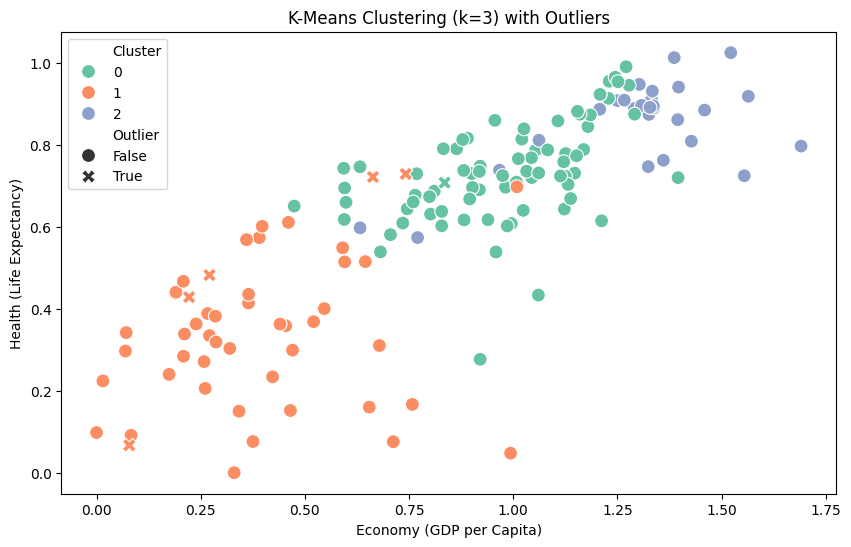

In [17]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=data, x='Economy (GDP per Capita)', y='Health (Life Expectancy)',
                hue='Cluster', style='Outlier', palette='Set2', s=100)
plt.title("K-Means Clustering (k=3) with Outliers")
plt.show()

### Line Plot of Features per Country (Sorted by Happiness)

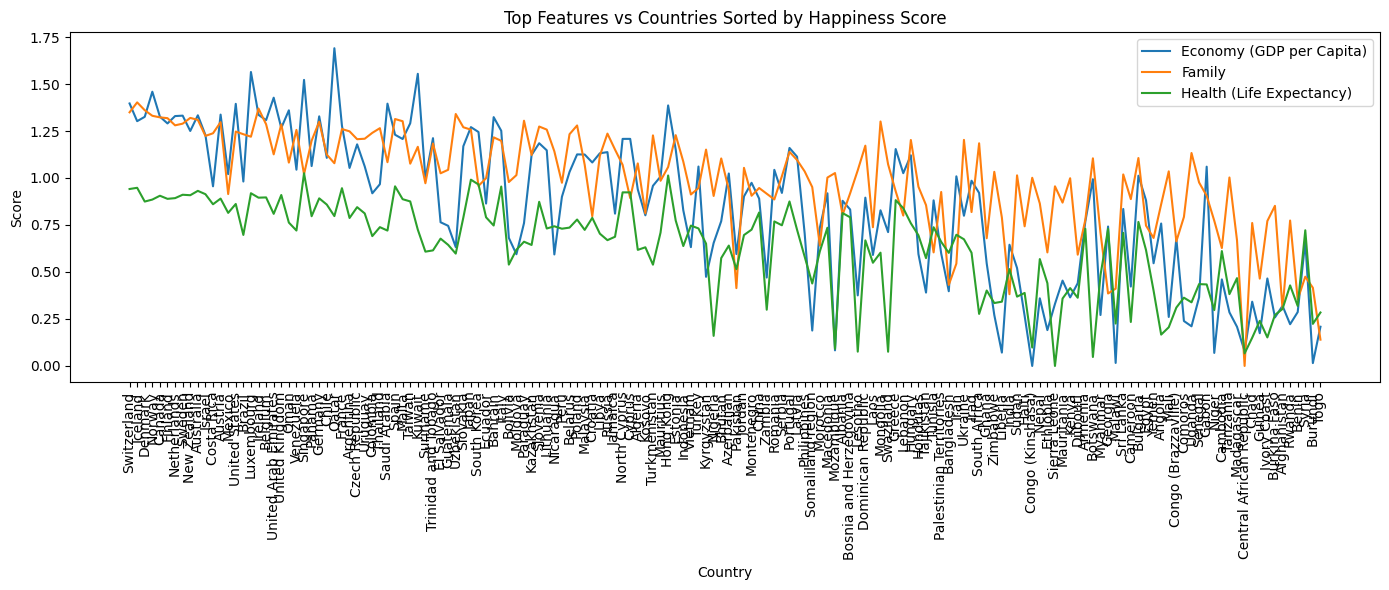

In [19]:
sorted_df = data.sort_values(by='Happiness Score', ascending=False)

plt.figure(figsize=(14, 6))
for feature in ['Economy (GDP per Capita)', 'Family', 'Health (Life Expectancy)']:
    plt.plot(sorted_df['Country'], sorted_df[feature], label=feature)

plt.xticks(rotation=90)
plt.title("Top Features vs Countries Sorted by Happiness Score")
plt.xlabel("Country")
plt.ylabel("Score")
plt.legend()
plt.tight_layout()
plt.show()


## Heatmap

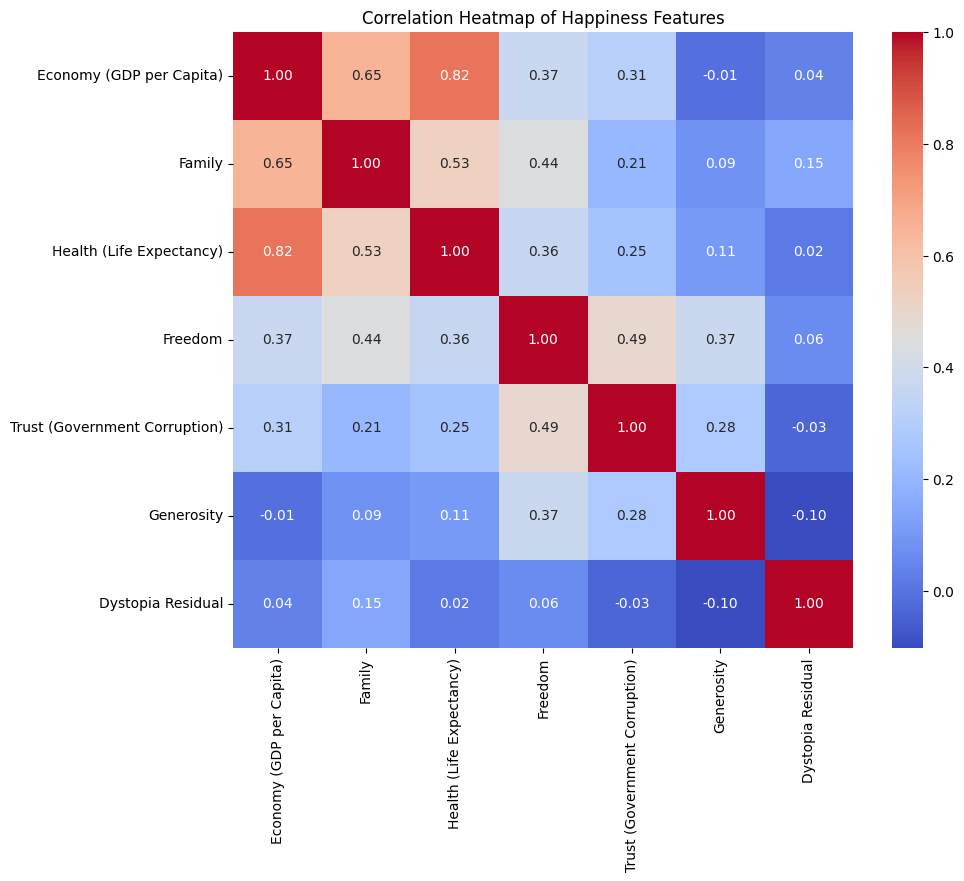

In [20]:
plt.figure(figsize=(10, 8))
sns.heatmap(data[features].corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Heatmap of Happiness Features")
plt.show()


### Box Plot (Check Distribution & Outliers for Each Feature)

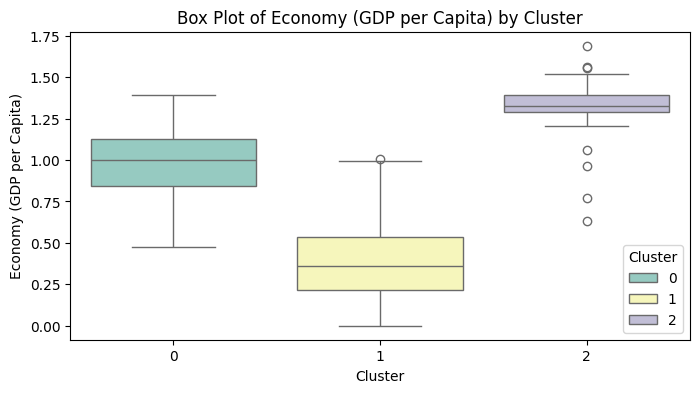

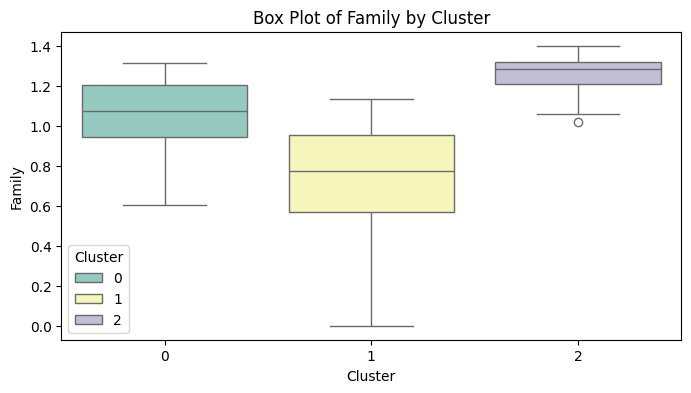

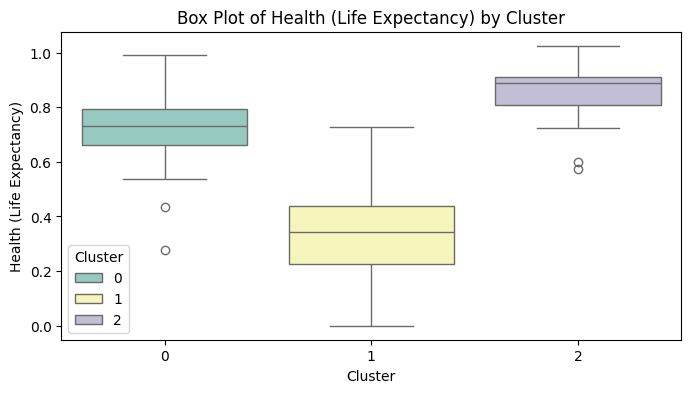

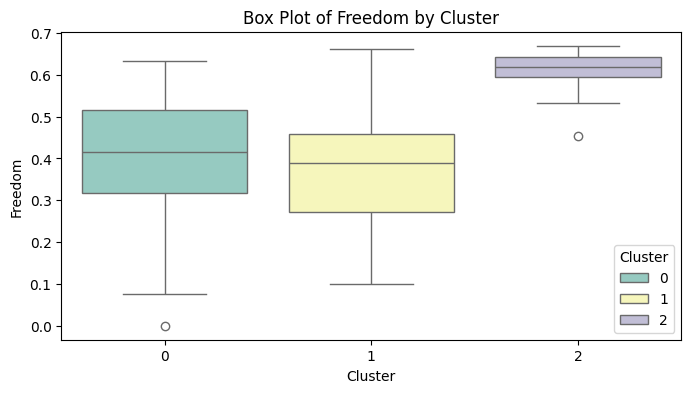

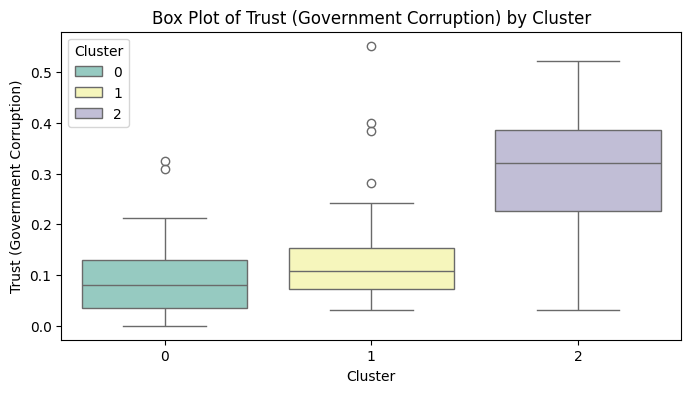

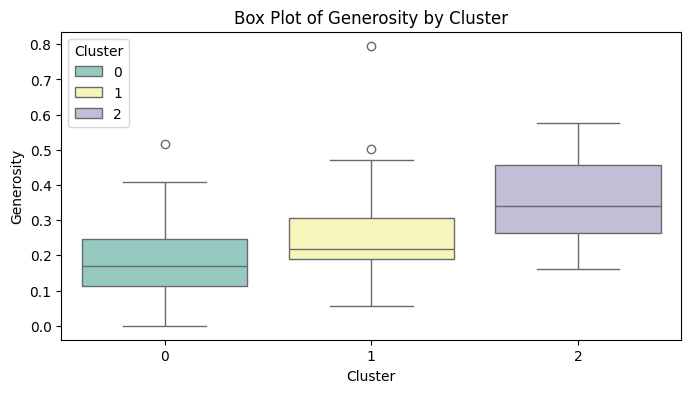

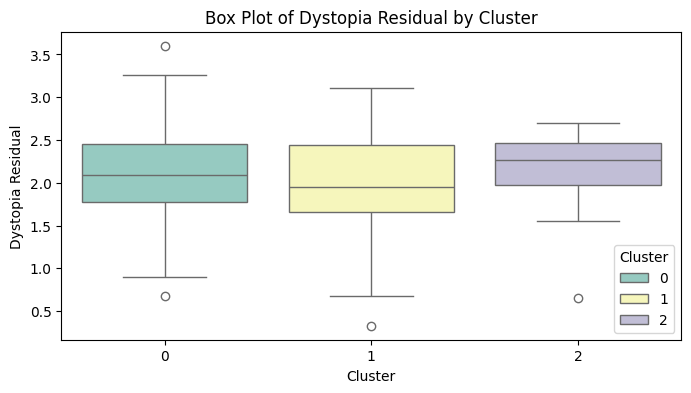

In [23]:
for feature in features:
    plt.figure(figsize=(8, 4))
    sns.boxplot(x='Cluster', y=feature, data=data, hue='Cluster', palette='Set3')
    plt.title(f"Box Plot of {feature} by Cluster")
    plt.legend(title="Cluster")
    plt.show()


### Pair Plot (Multivariate Scatter Matrix)

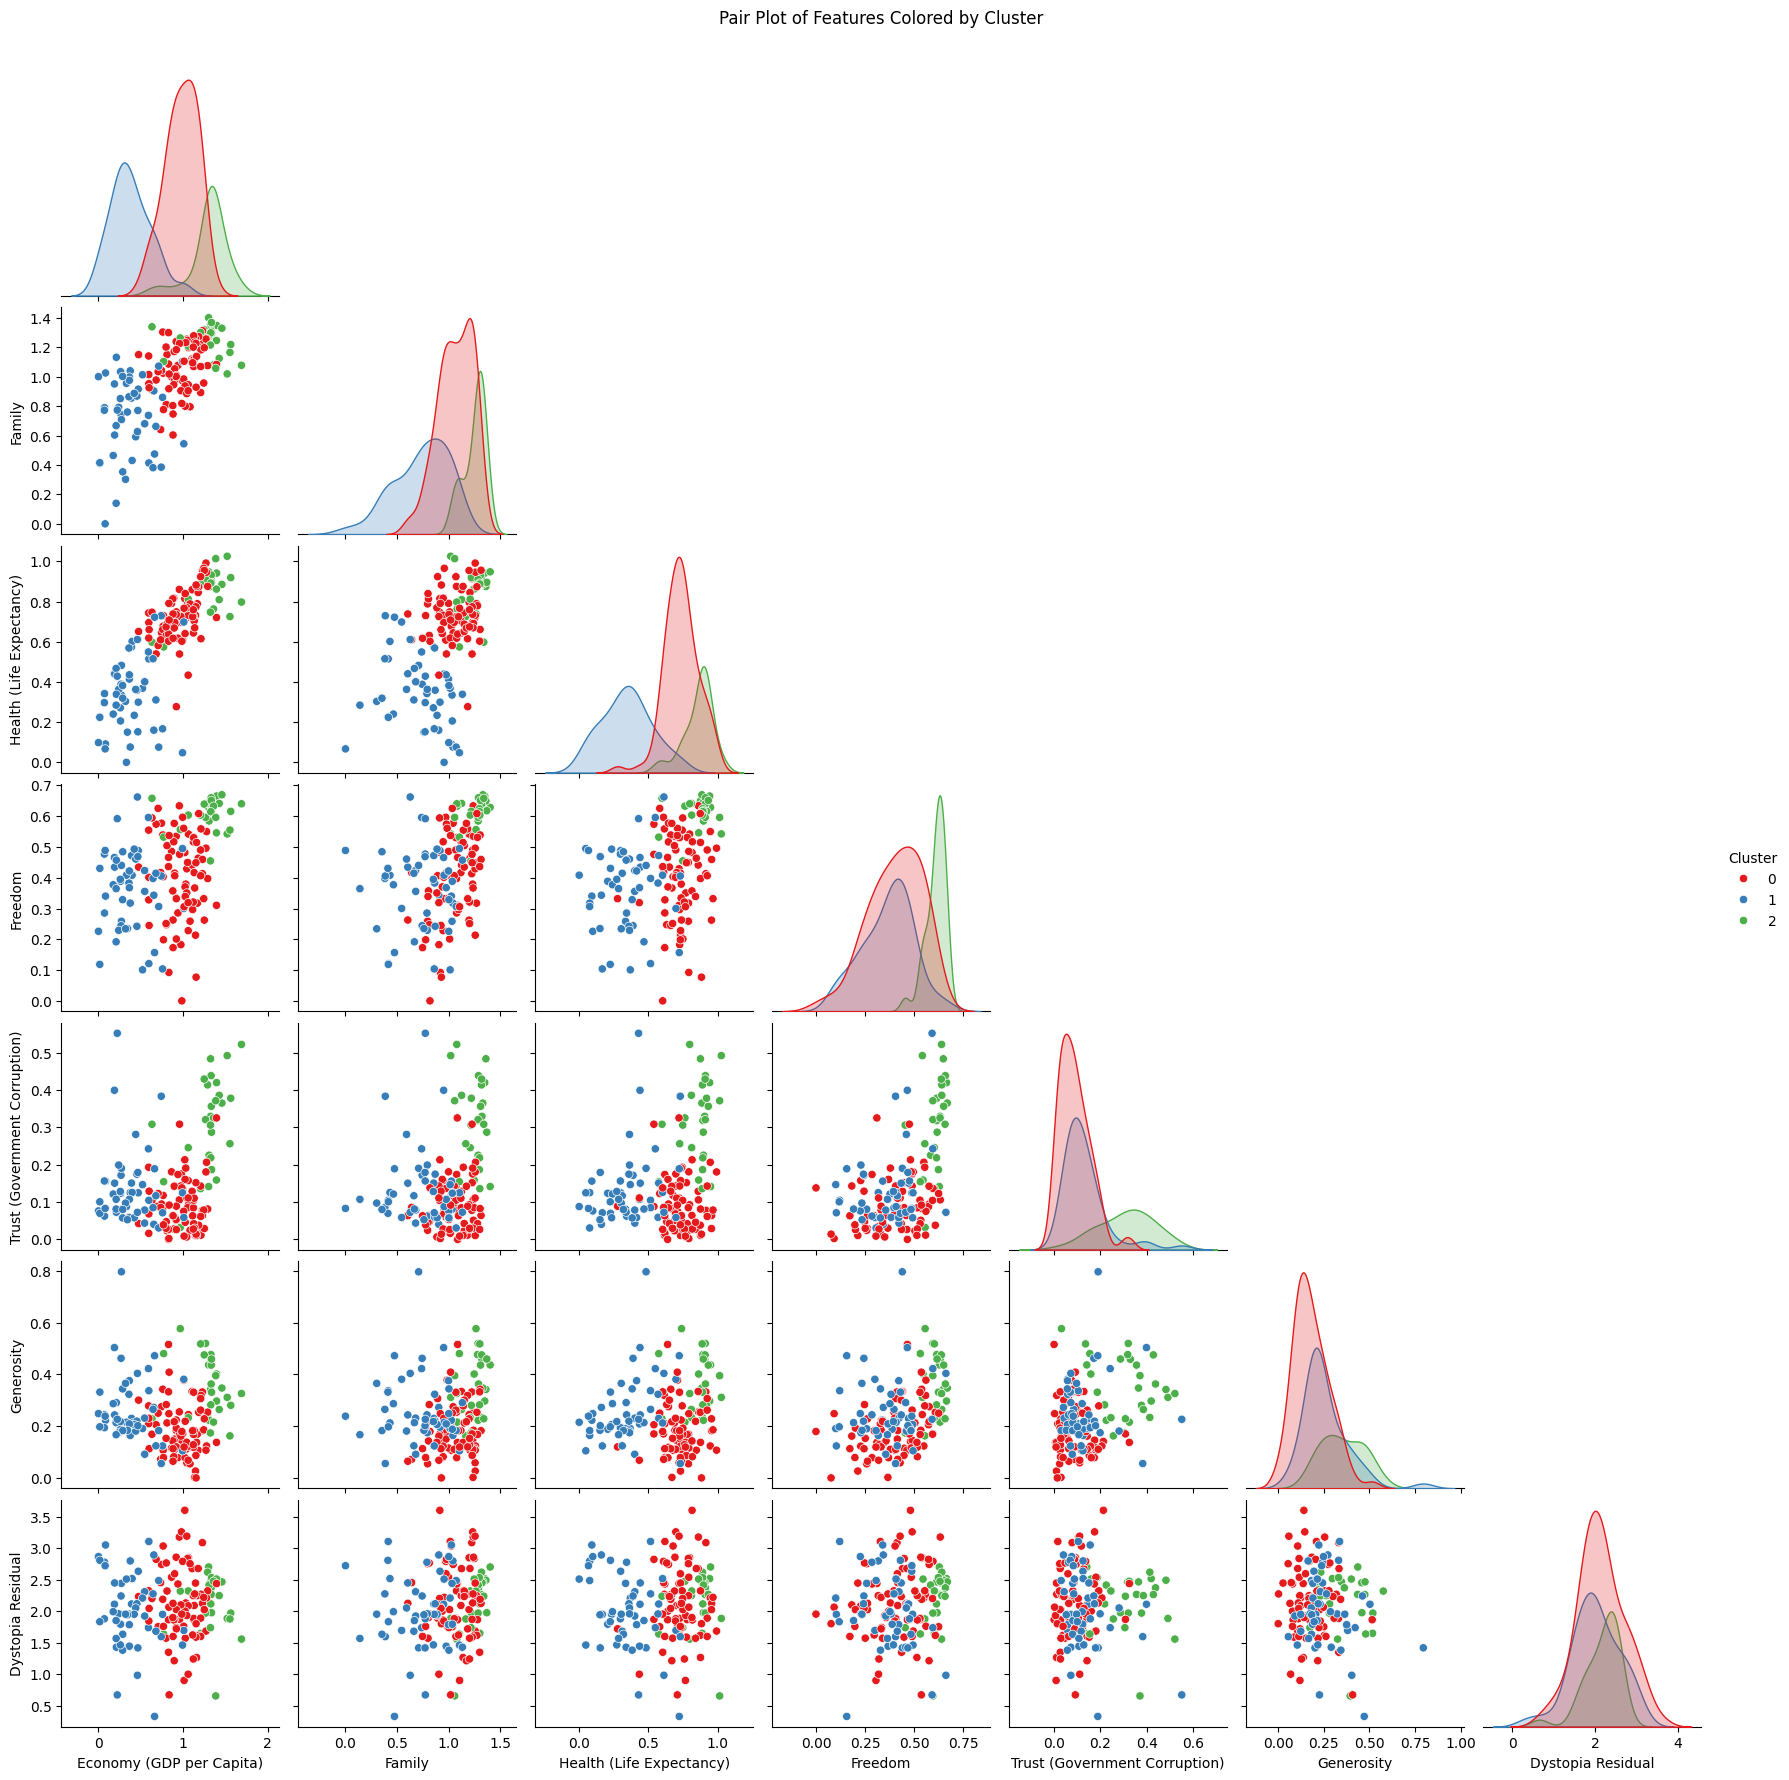

In [25]:
sns.pairplot(data, vars=features, hue='Cluster', palette='Set1', corner=True)
plt.suptitle("Pair Plot of Features Colored by Cluster", y=1.02)
plt.show()